# Otimização de modelos ML para predição de diabetes

## Contextualização

A diabetes é uma das doenças crônicas mais prevalentes e de crescimento alarmante em todo o mundo. Ela afeta milhões de pessoas, causando impactos significativos na saúde e na qualidade de vida. A diabetes não apenas representa uma carga substancial para os sistemas de saúde, mas também impõe desafios pessoais e econômicos para aqueles que vivem com a doença.

Diante desse cenário,nosso objetivo é encontrar maneiras eficazes de prever o risco de desenvolvimento da diabetes em indivíduos, a fim de possibilitar intervenções precoces e estratégias de prevenção direcionadas.

É nesse contexto que nosso projeto de predição de diabetes se torna relevante. Nossa missão é construir um modelo de inteligência artificial (IA) que utilize dados fáceis de preencher por qualquer pessoa de forma a combater o subdiagnóstico (cerca de 50%) e orientar pessoas em risco de diabetes a procurar ajuda especializada. O objetivo central é prever com precisão se as pessoas são propensas a desenvolver diabetes com base em informações simples e acessíveis



## Secções

**- 1 Importação e limpeza dos dados**  

**- 2 EDA**  

**- 3 Otimização de modelos**  

## Origem dos dados
link: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset  

Este conjunto de dados foi coletados por meio de questionários diretos de pacientes do Sylhet Diabetes Hospital em Sylhet, Bangladesh e aprovado por um médico.

Early stage diabetes risk prediction dataset.. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5VG8H

Base de dados obtida em 23 de setembro de 2023.



**Razões para a escolha:**  
- pode ser construído um modelo com dados fáceis de preencher por qualquer pessoa, sem necessidade de exames de sangue ou qualquer procedimento invasivo ou complexo.

**Drawbacks da base de dados:**
- cerca de 500 entradas pode ser pouco para o treino do modelo  
    - no entanto, dados clínicos são difíceis de obter em larga escala
- aparentemente sem citações, apesar de outras DB também arquivas no UCI terem muito mais citações 
- as colunas não acompanhadas de explicações detalhadas sobre os dados contidos nem sobre como os dados foram obtidos
    - os nomes das colunas são em geral auto-explicativos
    
    
## Objetivos
Construir um modelo da IA com dados fáceis de preencher por qualquer pessoa, sem necessidade de exames de sangue ou qualquer procedimento invasivo ou complexo e prever as pessoas são propensas a devevolver Diabetes.

## Colunas do conjunto de Dados

* Age 	
* Sex 		
* Polyuria 		
* Polydipsia 		
* sudden weight loss 		
* weakness 		
* Polyphagia 	
* Genital thrush 	
* visual blurring 		
* Itching 		
* Irritability 	
* delayed healing 		
* partial paresis 		
* muscle stiffness 		
* Alopecia 	
* Obesity 		
* Class 	


## Roteiro para o Projeto de Predição de Diabetes


### Etapa 1: Coletar Dados

- **Identificar Fontes de Dados**: Identificar as fontes de dados disponíveis, como conjuntos de dados públicos relacionados à diabetes.

- **Obter os Dados**: Adquirir os dados necessários, seja baixando conjuntos de dados públicos ou coletando dados relevantes, se aplicável.

### Etapa 2: Pré-processar os Dados

- **Limpar os Dados**: Realizar a limpeza inicial dos dados, tratando valores ausentes e inconsistentes.

- **Transformar os Dados**: Realizar transformações nos dados, se necessário, como codificação de variáveis categóricas.

### Etapa 3: Explorar os Dados e Análisar

- **Realizar Análise Descritiva**: Realizar uma análise descritiva dos dados para entender as características e tendências dos dados.

- **Criar Visualizações de Dados**: Criar visualizações gráficas para representar os dados de forma eficaz.

### Etapa 4: Fazer Engenharia de Recursos

- **Selecionar features**: Identificar os features mais relevantes para a previsão da diabetes.

- **Desenvolver features**: Desenvolver features adicionais, se necessário, com base no conhecimento do domínio.

### Etapa 5: Modelar

- **Dividir o Conjunto de Dados**: Separar os dados em conjuntos de treinamento e teste.

- **Escolher o Modelo**: Selecionar algoritmos de aprendizado de máquina adequados para criar o modelo de previsão.

- **Treinar o Modelo**: Treinar os modelos nos dados de treinamento, ajustando os hiperparâmetros do modelo para melhorar o desempenho.

- **Realizar Validação Cruzada**: Realizar a validação cruzada para avaliar a generalização do modelo.

### Etapa 6: Avaliar o Modelo

- **Avaliar o Desempenho**: Avaliar o desempenho dos modelos usando métricas relevantes recall e F1-score.


------------------------------------------------------------------------
(em outro processo:)  
### Etapa 7: Implantar e Tornar Acessível

- **Implementar de Forma Acessível**: Desenvolver uma interface acessível para coletar dados não invasivos dos usuários.

### Etapa 9: Comunicar e Documentar

- **Comunicar os Resultados**: Apresentar os resultados de forma clara e compreensível para o público-alvo.

- **Documentar**: Criar uma documentação abrangente do projeto, incluindo informações sobre o modelo, dados e procedimentos.

### Etapa 10: Monitorar e Manter

- **Monitorar Continuamente**: Estabelecer um sistema de monitoramento contínuo para garantir que o modelo esteja funcionando corretamente.

- **Manter**: Manter o modelo e os dados atualizados, conforme necessário.

## Importação e limpeza dos dados

In [1]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, recall_score, f1_score
import joblib

In [2]:
#importar dados
df = pd.read_csv('datasets/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
#transformar nomes de colunas em snake_case
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Algumas das colunas correspondem a alterações que provavelmente os usuários terão dificuldade em saber, e nós queremos um formulário com coisas que todo mundo saiba preencher com facilidade. Vamos escolher quais colunas não usar.**

**Notas sobre cada coluna:**  
- polyuria
    - poliúria
    - urinar mais de 2.5L por dia
- polydipsia
    - polidipsia
    - vontade constante de beber água
- sudden_weight_loss
    - perda de peso repentina
- weakness
    - fraqueza
- polyphagia
    - polifagia
    - vontade de comer superior ao normal
- genital_thrush
    - infeção fúngica genital
- visual_blurring
    - visão turva
- itching
    - comichão
- irritability
    - irritabilidade
- delayed_healing
    - cicatrização lenta
- partial_paresis
    - paresia parcial
    - movimento limitado ou fraco, pouca força e coordenação em parte do corpo
- muscle_stiffness
    - rigidez muscular
- alopecia
    - alopécia
    - perda de cabelo
- obesity
    - obesidade
    
Objetivo: 
 
- `Class`: A coluna alvo que indica a classificação dos pacientes para diabétes ("Positive" para risco de desenvolver diabetes ou "Negative" para não desenvolver diabetes).

In [4]:
#infos do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

Sem dados nulos.

In [5]:
#verificar dados únicos para cada coluna
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

#mostrar dados unicos
for column, values in unique_values.items():
    print(f'Unique values in {column}: {values}')

Unique values in age: [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Unique values in gender: ['Male' 'Female']
Unique values in polyuria: ['No' 'Yes']
Unique values in polydipsia: ['Yes' 'No']
Unique values in sudden_weight_loss: ['No' 'Yes']
Unique values in weakness: ['Yes' 'No']
Unique values in polyphagia: ['No' 'Yes']
Unique values in genital_thrush: ['No' 'Yes']
Unique values in visual_blurring: ['No' 'Yes']
Unique values in itching: ['Yes' 'No']
Unique values in irritability: ['No' 'Yes']
Unique values in delayed_healing: ['Yes' 'No']
Unique values in partial_paresis: ['No' 'Yes']
Unique values in muscle_stiffness: ['Yes' 'No']
Unique values in alopecia: ['Yes' 'No']
Unique values in obesity: ['Yes' 'No']
Unique values in class: ['Positive' 'Negative']


Todas a colunas apresentam os dados esperados. 

1. **Duplicatas**
    - Duplicatas não foram pesquisadas por não haver colunas que possam ser usadas como identificadores únicos, nem a combinação de fatores pode ser informar se cada entrada é única ou não.  

2. **Verificação de Dados Ausentes**
    - Não há valores ausentes.  

3. **Valores Únicos**
    - Verificamos uma lista dos valores únicos em cada coluna, para entender a diversidade e a natureza das variáveis categóricas.

## 2 EDA

In [6]:
#estatística descritiva das idades
df.describe()

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Média e mediana próximas indicam um distribuição provavelmente próxima do normal sem muitos outliers.

### Resumo:

* Temos um conjunto de dados com as seguintes caracteristica:  

* Contagem: Existem 520 observações (ou registos) no nosso dataset.  

* Média (mean): A idade média é de aproximadamente 48,03 anos.  

* Desvio Padrão (std): O desvio padrão é cerca de 12,15 anos. Isso indica o quanto os valores individuais se afastam da média. Um desvio padrão maior indica uma dispersão maior dos dados.  


* Valor Mínimo (min): A idade mínima registrada no conjunto de dados é 16 anos.  


* Primeiro Quartil (25% - Q1): 25% das idades estão abaixo de 39 anos.  


* Mediana (50% - Q2): A mediana, que é o valor que divide o conjunto de dados ao meio, é de 47,5 anos. Isso significa que metade das idades estão abaixo de 47,5 anos e metade está acima.  


* Terceiro Quartil (75% - Q3): 75% das idades estão abaixo de 57 anos.  


* Valor Máximo (max): A idade máxima registrada no conjunto de dados é de 90 anos.  


* Não temos Valores Ausentes no conjunto de dados.

Nada de estranho, com ums distribuição relativamente normal.

**Vamos apagar as colunas em que usuários terão mais dificuldade de preencher com acurácia. (após discussão interna do grupo de trabalho) (e que portanto farão o questionário desnecessariamente tedioso)**

In [7]:
#apagar colunas difíceis de auto-avaliação

del_cols = ['weakness', 'genital_thrush', 'itching', 'partial_paresis', 'muscle_stiffness']
df.drop(columns=del_cols, inplace=True)
df.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,polyphagia,visual_blurring,irritability,delayed_healing,alopecia,obesity,class
0,40,Male,No,Yes,No,No,No,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,No,Yes,No,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,No,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,No,No,Yes,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   polyphagia          520 non-null    object
 6   visual_blurring     520 non-null    object
 7   irritability        520 non-null    object
 8   delayed_healing     520 non-null    object
 9   alopecia            520 non-null    object
 10  obesity             520 non-null    object
 11  class               520 non-null    object
dtypes: int64(1), object(11)
memory usage: 48.9+ KB


Agora temos 12 colunas ao todo. 11 de features e 1 de target (class). 

In [9]:
#substituir valores de string por logicos 1 e 0
# Yes e Positive são 1. Male é 0 e Female é 1.
df.replace({'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0, 'Female': 1, 'Male': 0}, inplace=True)
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,polyphagia,visual_blurring,irritability,delayed_healing,alopecia,obesity,class
0,40,0,0,1,0,0,0,0,1,1,1,1
1,58,0,0,0,0,0,1,0,0,1,0,1
2,41,0,1,0,0,1,0,0,1,1,0,1
3,45,0,0,0,1,1,0,0,1,0,0,1
4,60,0,1,1,1,1,1,1,1,1,1,1


In [23]:
#ver o balanceamento de classe de class (futuro target)
df['class'].sum()/len(df)

0.6153846153846154

62% de entradas positivas para diabetes (vs 38% negativas)

In [24]:
#verificar desbalanceamento para diferentes colunas
for column in df.columns:
    rel_freq = df[column].sum()/len(df)
    print(f'{column}: \n{rel_freq}\n')

age: 
48.02884615384615

gender: 
0.36923076923076925

polyuria: 
0.49615384615384617

polydipsia: 
0.4480769230769231

sudden_weight_loss: 
0.4173076923076923

polyphagia: 
0.45576923076923076

visual_blurring: 
0.4480769230769231

irritability: 
0.2423076923076923

delayed_healing: 
0.4596153846153846

alopecia: 
0.34423076923076923

obesity: 
0.16923076923076924

class: 
0.6153846153846154



Ignorando 'age', as classes mais desbalanceadas são: gender (com 37% mulheres), irritabilidade (com 24% sim), e obesidade (com 17%).

### Análise de 'class'

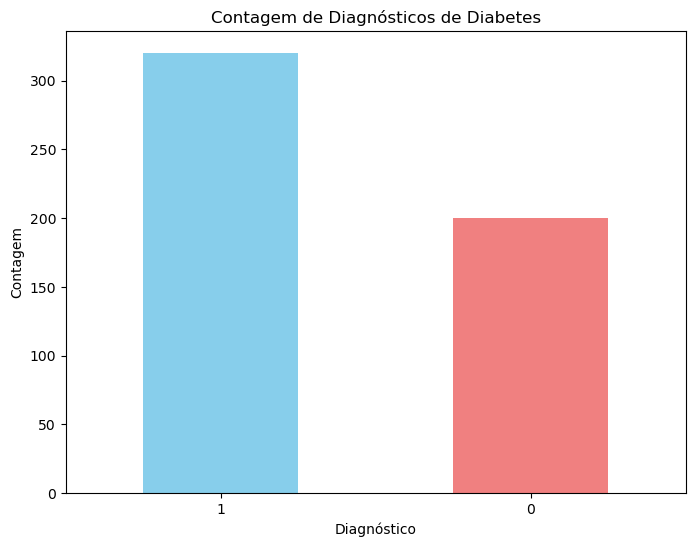

In [25]:
# Contagem de diagnósticos
diagnosis_counts = df['class'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Contagem de Diagnósticos de Diabetes')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

No conjunto de dados, há 320 observações com o diagnóstico "Positive" (positivo para diabetes) e 200 observações com o diagnóstico "Negative" (negativo para diabetes). Essas contagens representam o número de casos positivos e negativos para diabetes no conjunto de dados.

### Análise de gênero

In [26]:
df['gender'].value_counts()

0    328
1    192
Name: gender, dtype: int64

In [27]:
(df['gender'].value_counts() / len(df)) * 100

0    63.076923
1    36.923077
Name: gender, dtype: float64

No conjunto de dados, há 328 observações de pacientes do sexo masculino (Male) e 192 observações de pacientes do sexo feminino (Female). Onde 63% do sexo masculino e 37% do sexo Femenino

In [28]:
#frequência de gênero vs diagnostico
count_df = df.groupby(['gender', 'class']).size().reset_index(name='Count')
count_df

,gender,class,Count
0,0,0,181
1,0,1,147
2,1,0,19
3,1,1,173


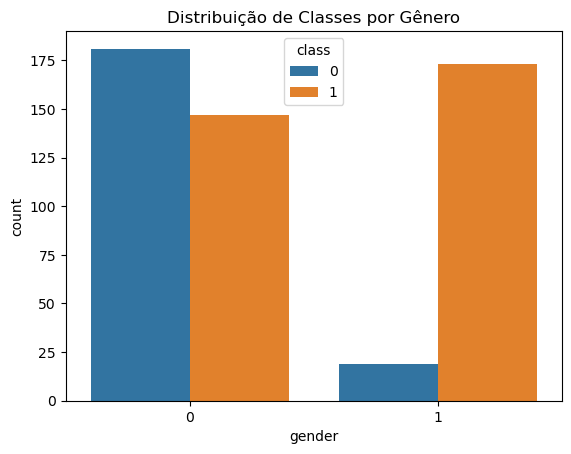

In [29]:
#gráfico de gênero vs diagnostico
sns.countplot(data=df, x='gender', hue='class')
plt.title('Distribuição de Classes por Gênero')
plt.show()

19 pacientes do sexo feminino com diagnóstico negativo (0).  
173 pacientes do sexo feminino com diagnóstico positivo (1).  
181 pacientes do sexo masculino com diagnóstico negativo (0).  
147 pacientes do sexo masculino com diagnóstico positivo (1).  
**No conjunto de dados usados, há uma incidência muito maior de diagnóstico positivo nas mulheres do que nos homens. Para melhoria futura do modelo precisamos utilizar um conjunto de dados mais balanceado.**  
**Vamos tirar o gênero da análise por criar um viés artificial de diagnóstico, que não corresponde à distribuição na população nem se encontra.**

In [36]:
#retirar gender, que não servirá para o modelo
df = df.drop('gender', axis=1)
df.head()

,age,polyuria,polydipsia,sudden_weight_loss,polyphagia,visual_blurring,irritability,delayed_healing,alopecia,obesity,class,age_intervals
0,40,0,1,0,0,0,0,1,1,1,1,"(30, 40]"
1,58,0,0,0,0,1,0,0,1,0,1,"(50, 60]"
2,41,1,0,0,1,0,0,1,1,0,1,"(40, 50]"
3,45,0,0,1,1,0,0,1,0,0,1,"(40, 50]"
4,60,1,1,1,1,1,1,1,1,1,1,"(50, 60]"


### Análise de idades

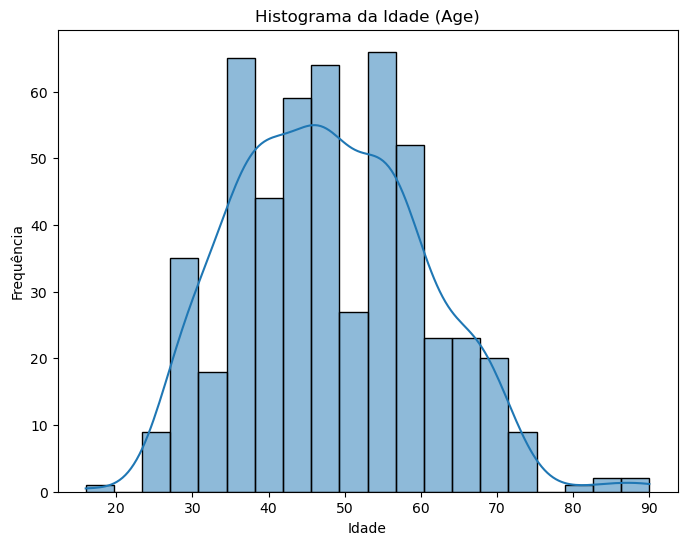

In [37]:
#histograma de frequência por idade
# Definindo o layout da figura
plt.figure(figsize=(8, 6))

# Plotando o histograma da variável 'Age'
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histograma da Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibindo o histograma
plt.show()

Podemos observar que a maioria das pessoas no conjunto de dados parece estar na faixa dos 40 a 50 anos de idade. Também podemos ver que a distribuição parece seguir uma forma geralmente simétrica, com uma cauda mais longa à direita, o que sugere que há algumas pessoas mais velhas no conjunto de dados.

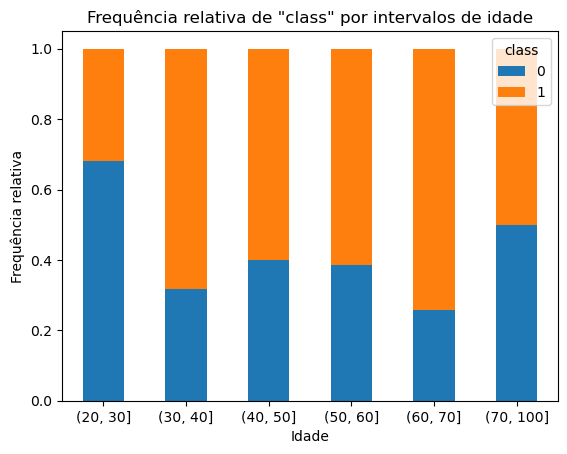

In [38]:
# Define age intervals (bins)
age_bins = [20, 30, 40, 50, 60, 70, 100]

# criar intervalos para idade usando pd.cut
df['age_intervals'] = pd.cut(df['age'], bins=age_bins)

# calcular a frequencia relativa de 'class' dentro de cada intervalo
relative_freq = df.groupby(['age_intervals', 'class']).size().unstack(fill_value=0)
relative_freq = relative_freq.div(relative_freq.sum(axis=1), axis=0)

# Plotar gráfico de barras
ax = relative_freq.plot(kind='bar', stacked=True)
ax.set_ylabel('Frequência relativa')
ax.set_xlabel('Idade')

plt.title('Frequência relativa de "class" por intervalos de idade')
plt.xticks(rotation=0)
plt.legend(title='class')
plt.show()

Até aos 30 anos, a frequência de diabetes é menor, mas mantém-se mais ou menos constante com a idade, nesta amostra de dados.  

Não parece haver uma tendência clara de que a idade esteja estritamente relacionada ao diagnóstico de diabetes. Não podemos dizer definitivamente que uma faixa etária específica tem mais ou menos chances de ser diagnosticada com diabetes com base apenas neste gráfico.

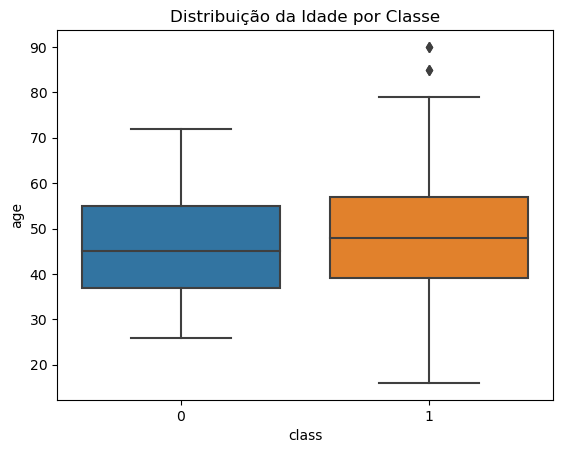

In [39]:
#idade vs diagnóstico (class)
sns.boxplot(x='class', y='age', data=df)
plt.title('Distribuição da Idade por Classe')
plt.show()

In [40]:
#comparação estatística entre as colunas do gráfico acima

# Dividir os dados em dois grupos com base na coluna 'class'
classe_0 = df[df['class'] == 0]['age']
classe_1 = df[df['class'] == 1]['age']

# Realizar um teste t independente para comparar as médias dos dois grupos
estatistica_t, valor_p = stats.ttest_ind(classe_0, classe_1, equal_var=False)

# Exibir os resultados
print("Estatística T:", estatistica_t)
print("Valor P:", valor_p)

# Determinar o nível de significância (alpha)
alpha = 0.05

# Verificar se o valor P é menor que o nível de significância
if valor_p < alpha:
    print("Rejeitar a hipótese nula: Existe uma diferença significativa entre os grupos.")
else:
    print("Não rejeitar a hipótese nula: Não há diferença significativa entre os grupos.")


Estatística T: -2.489015284677564
Valor P: 0.013193281214799128
Rejeitar a hipótese nula: Existe uma diferença significativa entre os grupos.


In [41]:
#estatística descritiva de idades para grupo sem diabetes
classe_0.describe()

count    200.000000
mean      46.360000
std       12.080983
min       26.000000
25%       37.000000
50%       45.000000
75%       55.000000
max       72.000000
Name: age, dtype: float64

In [42]:
#estatística descritiva de idades para grupo COM diabetes
classe_1.describe()

count    320.000000
mean      49.071875
std       12.097481
min       16.000000
25%       39.000000
50%       48.000000
75%       57.000000
max       90.000000
Name: age, dtype: float64

* Para a classe 1 (positivo), a mediana da idade é de 48 anos, com um intervalo interquartil (IQR) entre aproximadamente 39 e 57 anos. Existem alguns valores discrepantes (outliers) à direita da caixa, o que indica que há algumas pessoas mais velhas nessa classe.

* Para a classe 0 (negativo), a mediana da idade também parece estar em torno de 45 anos, com um IQR 37 a 55 anos.

* Globalmente, as distribuições da idade nas duas classes são bastante semelhantes, com sobreposição significativa entre as caixas, mas ainda assim a diferença de idade é significativa.

## 3 Otimização de modelos ML

### Ajuste dos dados e Separação em teste e treino

In [43]:
# dividir em festures e target
X = df.drop(columns = ['class', 'age_intervals'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% dos dados reservados para teste

In [44]:
#scaling dos dados
#colunas numéricas
numeric = ['age']

#preparaçãoda variável de escalonamento com as colunas numéricas do treino
scaler = StandardScaler()
scaler.fit(X_train[numeric])

#transformação da coluna com scaling
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

**Com os dados prontos, vamos otimizar os modelos.**  
- usaremos bootstrap para evitar viés no fitting dos modelos
- as métricas a usar serão
    - recall: melhor que precisão neste caso porque é preferível sobre-estimar os casos positivos
    - F1: para garantir que não há um exagero da sobre-estimação, então é uma métrica que toma em conta ambos o recall e precisão

### Regressão logística

In [45]:
# Logistic Regression
model = LogisticRegression()

#fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

lr_f1 = f1_score(y_train, y_predicted)
lr_recall = recall_score(y_train, y_predicted)


print('F1 Score on Training Set:', lr_f1)
print('Recall Score on Training Set:', lr_recall)

F1 Score on Training Set: 0.8819875776397516
Recall Score on Training Set: 0.8554216867469879


**O modelo com melhor valor de recall é também o de maior F1.**  
 
**Recall:0.882**  
**F1: 0.855**

### Decicion Tree

In [46]:
#guardar valores
depth = []
leaves = []
weights = []
f1_dt = []
recall_dt = []

for dep in range(2,23,5):
    for leave in range(1,21,5):
        for weight in [None, 'balanced']:
            # Decision Tree Classifier
            model = DecisionTreeClassifier(
                max_depth = dep,
                min_samples_leaf = leave,
                class_weight = weight,
                random_state=42
            )
            
            #guardar valores dos parâmetros
            depth.append(dep)
            leaves.append(leave)
            weights.append(weight)
                     


            #fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
            y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

            f1 = f1_score(y_train, y_predicted)
            recall = recall_score(y_train, y_predicted)
            
            f1_dt.append(f1)
            recall_dt.append(recall)
            
# criar dicionário a partir das listas
data = {
    'Max Depth': depth,
    'Min Samples per Leaf': leaves,
    'Class Weight': weights,
    'F1 Score': f1_dt,
    'Recall Score': recall_dt
}

# criar DataFrame a partir do dicionário
dt_df = pd.DataFrame(data)

#ver valores ordenados por recall
dt_df.sort_values(by=['Recall Score','F1 Score'], ascending=False)



,Max Depth,Min Samples per Leaf,Class Weight,F1 Score,Recall Score
16,12,1,None,0.942857,0.927711
24,17,1,None,0.942857,0.927711
32,22,1,None,0.942857,0.927711
9,7,1,balanced,0.950413,0.923695
8,7,1,None,0.942623,0.923695
17,12,1,balanced,0.940695,0.923695
25,17,1,balanced,0.940695,0.923695
33,22,1,balanced,0.940695,0.923695
12,7,11,None,0.886275,0.907631
20,12,11,None,0.886275,0.907631


**O modelo com melhor valor de recall é também o de maior F1.**  
Os hiperparâmetros (menos complexos) são:  
max_depth = 12,  
min_samples_leaf = 1,  
class_weight = None   
  
**Recall:0.928**  
**F1: 0.943**  


Interessante notar que o balanceamento piorou um pouco o modelo. Mas pode dever-se ao baixo número de amostras usado.

### Random Forest

In [47]:
# Random Forest Classifier


#guardar valores
depth = []
estimators = []
weights = []
f1_dt = []
recall_dt = []

for dep in range(2,23,5):
    for est in range(1,31,5):
        for weight in [None, 'balanced']:
            # Decision Tree Classifier
            model = RandomForestClassifier(
                max_depth = dep,
                n_estimators = est,
                class_weight = weight,
                random_state=42
            )
            
            #guardar valores dos parâmetros
            depth.append(dep)
            estimators.append(est)
            weights.append(weight)
                     


            #fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
            y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

            f1 = f1_score(y_train, y_predicted)
            recall = recall_score(y_train, y_predicted)
            
            f1_dt.append(f1)
            recall_dt.append(recall)
            
# criar dicionário a partir das listas
data = {
    'Max Depth': depth,
    'Max number of estimators': estimators,
    'Class Weight': weights,
    'F1 Score': f1_dt,
    'Recall Score': recall_dt
}

# criar DataFrame a partir do dicionário
rf_df = pd.DataFrame(data)

#ver valores ordenados por recall
rf_df.sort_values(by=['Recall Score','F1 Score'] , ascending=False)




,Max Depth,Max number of estimators,Class Weight,F1 Score,Recall Score
33,12,21,balanced,0.953157,0.939759
35,12,26,balanced,0.953157,0.939759
45,17,21,balanced,0.953157,0.939759
47,17,26,balanced,0.953157,0.939759
57,22,21,balanced,0.953157,0.939759
59,22,26,balanced,0.953157,0.939759
41,17,11,balanced,0.951220,0.939759
53,22,11,balanced,0.951220,0.939759
29,12,11,balanced,0.949290,0.939759
43,17,16,balanced,0.951020,0.935743


Temos 6 modelos com os mesmo valores de Recall e F1. Então melhor usar o modelo mais simples (e eficiente):  
- max_depth = 12
- n_estimators = 21
- class_weight = balanced

**Recall:0.934**  
**F1: 0.953**

### Gradient Descent: LightGBM

In [48]:
# LightGBM


#guardar valores

leaves = []
depths = []
learns = []
balances = []
f1_lg = []
recall_lg = []


for leaf in range(10,51,10):
    for dep in range(1,9,2):
        for learn in range(1,51,10): #ficará 0.01 a 0.5
            for balance in [False, True]:
            
            
                model = LGBMClassifier(
                    num_leaves=leaf,
                    max_depth=dep,
                    learning_rate=learn/100,
                    is_unbalance=balance,
                    random_state=12345
                )

                #guardar valores dos parâmetros
                depths.append(dep)
                leaves.append(leaf)
                learns.append(learn)
                balances.append(balance)
                



                #fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
                y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

                f1 = f1_score(y_train, y_predicted)
                recall = recall_score(y_train, y_predicted)

                f1_lg.append(f1)
                recall_lg.append(recall)
            
# criar dicionário a partir das listas
data = {
    'num_leaves': leaves,
    'max_depth': depths,
    'learning_rate': learns,
    'is_unbalance': balances,
    'F1 Score': f1_lg,
    'Recall Score': recall_lg
}

# criar DataFrame a partir do dicionário
lg_df = pd.DataFrame(data)

#ver valores ordenados por recall
lg_df.sort_values(by=['Recall Score','F1 Score'] , ascending=False).head(30)




,num_leaves,max_depth,learning_rate,is_unbalance,F1 Score,Recall Score
78,20,7,41,False,0.959016,0.939759
118,30,7,41,False,0.959016,0.939759
158,40,7,41,False,0.959016,0.939759
198,50,7,41,False,0.959016,0.939759
26,10,5,31,False,0.957055,0.939759
38,10,7,41,False,0.953157,0.939759
68,20,5,41,False,0.954918,0.935743
108,30,5,41,False,0.954918,0.935743
148,40,5,41,False,0.954918,0.935743
188,50,5,41,False,0.954918,0.935743


**Melhor modelo de LightGBM:**  

Escolhendo o modelo menos complexo entre os que têm maior valor de Racall e F1, obtemos o seguinte:
- num_leaves = 20
- max_depth = 7
- learning_rate = 47
- is_unbalance = False

**Recall: 0.940**  
**F1: 0.959**

## Exportar modelo

Os modelos testados apresentaram os seguintes valores:  

**Regressão Logística**  
Recall:0.882  
F1: 0.855  

**Decision Tree**  
Recall:0.928  
F1: 0.943 


**Random Forest:**  
Recall:0.934  
F1: 0.953 

**LightGBM**  
Recall: 0.940  
F1: 0.959  
    
O modelo de LightGBM foi o que apresentou melhores resultados, com os hiperparâmetros:  

- num_leaves = 20
- max_depth = 7
- learning_rate = 47
- is_unbalance = False

### Verificar no conjunto de testes

In [49]:
# Random Forest Classifier - verificar no teste e exportar


final_model = LGBMClassifier(
    num_leaves = 20,
    max_depth = 7,
    learning_rate = 47,
    is_unbalance = False
)

# Fit the model on your training data
final_model.fit(X_train, y_train)

predicted = final_model.predict(X_test)

f1 = f1_score(y_test, predicted)
recall = recall_score(y_test, predicted)

print(f'Valor de recall é:{recall}')
print(f'Valor de F1 score é:{f1}')

Valor de recall é:0.9295774647887324
Valor de F1 score é:0.9230769230769231


### Exportar modelo

O modelo manteve valores de recall e F1 elevados e próximos do treinamento que indica que o modelo não está overfitted.  


Podemos exportar o modelo para produção.

In [50]:
# guardar o modelo em um arquivo
joblib.dump(final_model, 'diabetes_prediction_sylhetdb_rf_model.pkl')

['diabetes_prediction_sylhetdb_rf_model.pkl']

# Conclusões

Foi criado um modelo de previsão de desenvolvimento de diabetes com sucesso, com métricas bastante positivas.

Este modelo pode agora ser usado pela web app em streamlit par integração na página web do projeto.

A maior ressalva é a qualidade dos dados coletados que não são uma amostra aleatória da população e contêm algumas features desbalanceadas.

No futuro, será relativamente fácil alterar ou atualizar a base de dados, exportando um outro modelo, sem alterar significativamente a estrutura do código de escolha do modelo, menos ainda o código da app subsequente, e quase inalterado na página web